<a href="https://colab.research.google.com/github/chandrashalini/Spam-Classifier-using-NLP/blob/main/Spam_Classifier_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd #import pandas for reading dataset


In [35]:
messages = pd.read_csv('https://raw.githubusercontent.com/chandrashalini/Spam-Classifier-using-NLP/main/SMSSpamCollection',sep='\t',names=["label","message"]) #labelling the name to the column

In [36]:
messages.shape #it shows 5572 rows and 2 columns

(5572, 2)

In [37]:
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


DATA CLEANING AND PREPROCESSING

In [38]:
import re
import nltk #import nlp library
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords #remove stopwords like is, am ,are 
from nltk.stem import WordNetLemmatizer # used for stemming purpose finding base root form of the word

nltk.download('wordnet')
wl = WordNetLemmatizer()
corpus  = []

#removing unneccesary characters like ,.[]
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
  review = review.lower()
  review = review.split()
  review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


CREATING BAG OF WORDS MODEL #creating document matrix

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(5000)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

TRAININ MODEL USING BAYES CLASSIFIER

In [45]:
from sklearn.naive_bayes import MultinomialNB

spam_Detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_Detect_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)
confusion_m

array([[1429,   22],
       [  12,  209]])

Text(0.5, 1.0, 'Accuracy Score: 0.9796650717703349')

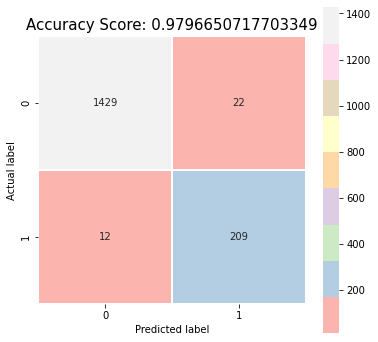

In [61]:
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import accuracy_score
plt.figure(figsize=(6,6))
sns.heatmap(confusion_m, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15)